In [1]:
import sys
sys.path.insert(0, '../src')
import numpy as np
import pickle

from frederickson import Frederickson
from environment import Environment
from integersolution import integer_solution
from fileio import parse_file
from utils import *

In [2]:
# to save variables on file along to way
# (Notice: the calculations are sometimes very long. We should minimize the risk of losing information)
SAVE_FOLDER = "./saved_results/comparison_v1/"

# possible buildings
buildings = ["magenta", "linear_offices", "Franch1", "vipiteno1", "poli", "RomainRolland1", "st_josephs_cath_high_school"]

# the possible types of structures
# - half: lower half of the modules are of type "big", the rest are of type "little"
# - half_inv: like half, but with module types inverted
# - alternate: alternating big and little modules
STRUCTURE_TYPES = ["half", "half_inv", "alternate"]

In [3]:
little_b = "magenta" # length of chr_tsp: ~4415
big_b = "linear_offices"  # length of chr_tsp: ~8874

little_dist_mat = get_building_matrix(little_b)
big_dist_mat = get_building_matrix(big_b)

matrices = [little_dist_mat, big_dist_mat]

def env_builder(structure_type, number_of_modules):
    modules_sequence = [0]*number_of_modules
    
    if structure_type == "half":
        # overwrite the first half of the list with ones
        # the second half is already initialized with zeros. Do not change it
        modules_sequence[:number_of_modules//2] = [1]*(number_of_modules//2)
    elif structure_type == "half_inv":
        # the first half is already initialized with zeros
        # overwrite the second half of the list with ones
        modules_sequence[number_of_modules//2:] = [1]*(number_of_modules-number_of_modules//2)
    elif structure_type == "alternate":
        for i in range(number_of_modules):
            # if i is even, put a 1 (big module), else put a 0 (little module)
            modules_sequence[i] = 1 if i%2==0 else 0
    else:
        raise ValueError("Allowed values for structure type are: ", STRUCTURE_TYPES)
        
    ########################
    # Notice: manage the connections. Now they are just all the same
    ########################
    
    # to get "distances increasing"
    distances = np.arange(number_of_modules-1)*5
    
    # to get "distances_10"
    #distances = [10]*(number_of_modules-1)
    
    # to get "distances_150"
    #distances = [150]*(number_of_modules-1)
    
    env = Environment(matrices, modules_sequence, distances)
    
    return env

# Batch calculations for different scenarios

In [5]:
# Structure-m(number of agents)-p(number of modules)
smp = [
    ("half",2,5), ("half",2,20), ("half",5,30),
     ("half_inv",2,5), ("half_inv",2,20), ("half_inv",5,30),
     ("alternate",2,5), ("alternate",2,20), ("alternate",5,30)
     ]

#### DO NOT EXECUTE NEXT CELL
The computation is extremely slow and the results have been saved in files, so there is no need to recompute it. Execute the cell after to load the results from the files.

# Execute instead the next one
It will load the variables from the files

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
fred_max_len_list, int_max_len_list = load_variables("distances_10.dump", SAVE_FOLDER)

fig = {}
mp_tuples=list(zip(*list(zip(*smp))[1:])) # remove the structure name and leave a list of (m,p)
mp = [str(t) for t in mp_tuples]

fig = plt.figure(figsize=(16, 3))
fig.suptitle("All connections set to 10", fontsize=20, y=1.1)


plt.subplot(1,3,1)
plt.xticks(range(3), mp[0:3])
plt.plot(fred_max_len_list[0:3], '-o', label='frederickson')
plt.plot(int_max_len_list[0:3], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half")
plt.legend(loc='upper left')

plt.subplot(1,3,2)
plt.xticks(range(3), mp[3:6])
plt.plot(fred_max_len_list[3:6], '-o', label='frederickson')
plt.plot(int_max_len_list[3:6], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half inverse")
plt.legend(loc='upper left')

plt.subplot(1,3,3)
plt.xticks(range(3), mp[6:9])
plt.plot(fred_max_len_list[6:9], '-o', label='frederickson')
plt.plot(int_max_len_list[6:9], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: alternate")
plt.legend(loc='upper left')

fig.savefig(SAVE_FOLDER + 'comparison-distance10.png')

plt.close() # prevent from showing plots 

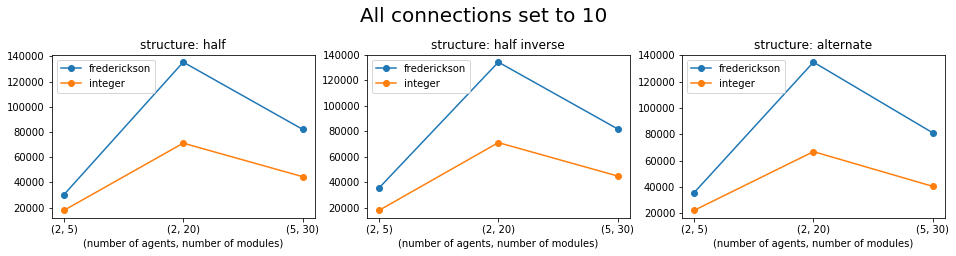

In [8]:
fig

In [9]:
fred_max_len_list, int_max_len_list = load_variables("distances_150.dump", SAVE_FOLDER)

fig = {}
mp_tuples=list(zip(*list(zip(*smp))[1:])) # remove the structure name and leave a list of (m,p)
mp = [str(t) for t in mp_tuples]

fig = plt.figure(figsize=(16, 3))
fig.suptitle("All connections set to 150", fontsize=20, y=1.1)


plt.subplot(1,3,1)
plt.xticks(range(3), mp[0:3])
plt.plot(fred_max_len_list[0:3], '-o', label='frederickson')
plt.plot(int_max_len_list[0:3], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half")
plt.legend(loc='upper left')

plt.subplot(1,3,2)
plt.xticks(range(3), mp[3:6])
plt.plot(fred_max_len_list[3:6], '-o', label='frederickson')
plt.plot(int_max_len_list[3:6], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half inverse")
plt.legend(loc='upper left')

plt.subplot(1,3,3)
plt.xticks(range(3), mp[6:9])
plt.plot(fred_max_len_list[6:9], '-o', label='frederickson')
plt.plot(int_max_len_list[6:9], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: alternate")
plt.legend(loc='upper left')

fig.savefig(SAVE_FOLDER + 'comparison_distance_150.png')

plt.close() # prevent from showing plots 

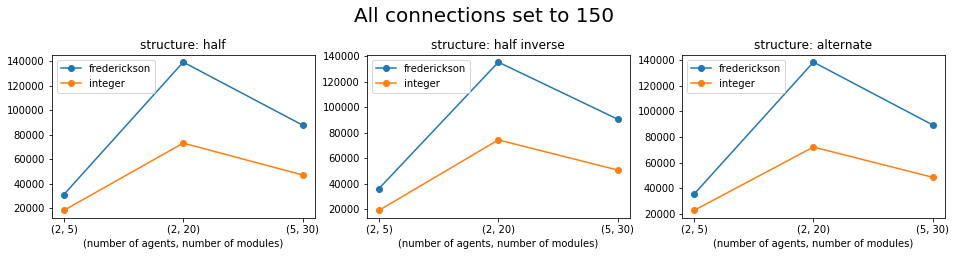

In [10]:
fig

In [11]:
fred_max_len_list, int_max_len_list = load_variables("distances_increasing.dump", SAVE_FOLDER)

fig = {}
mp_tuples=list(zip(*list(zip(*smp))[1:])) # remove the structure name and leave a list of (m,p)
mp = [str(t) for t in mp_tuples]

fig = plt.figure(figsize=(16, 3))
fig.suptitle("Connections increasing linearly with the index of the modules", fontsize=20, y=1.1)


plt.subplot(1,3,1)
plt.xticks(range(3), mp[0:3])
plt.plot(fred_max_len_list[0:3], '-o', label='frederickson')
plt.plot(int_max_len_list[0:3], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half")
plt.legend(loc='upper left')

plt.subplot(1,3,2)
plt.xticks(range(3), mp[3:6])
plt.plot(fred_max_len_list[3:6], '-o', label='frederickson')
plt.plot(int_max_len_list[3:6], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: half inverse")
plt.legend(loc='upper left')

plt.subplot(1,3,3)
plt.xticks(range(3), mp[6:9])
plt.plot(fred_max_len_list[6:9], '-o', label='frederickson')
plt.plot(int_max_len_list[6:9], '-o', label='integer')
plt.xlabel("(number of agents, number of modules)")
plt.title("structure: alternate")
plt.legend(loc='upper left')

fig.savefig(SAVE_FOLDER + 'comparison_increasing.png')

plt.close() # prevent from showing plots 

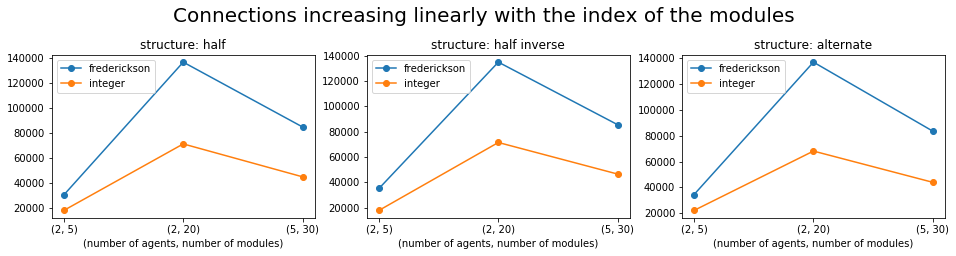

In [12]:
fig